In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier





import warnings
warnings.filterwarnings("ignore")


import acquire
import telco_prep


# Predicting Customer Churn - Classification Project
Project Goal
- The goal of this project is to use statistical analysis and models on the Telco database in order to accurately predict customer churn and identify the keys drivers. We can measure the success of the model's predicitions by asssessing the accuracy of the model and to monitor future churn to evaluate if overall churn decreases or increases after implenting the recommendations. 

Project Description
- The telecommunication business is extremely competitive and keeping a customer is cheaper than acquiring a new one. One way to secure revenue is to try to maximize the amount of current customers staying with the company and to understand the factors of churn in order to minimize customers leaving. To acheive this, we will look at our customer database to try an pinpoint the cause of churn and identify ways to lower the company's overall churn ratio.  Previous work shown that higher monthly charges and shorter tenure tends to churn more than longer term contracts. In order to analyze monthly costs, I will be looking into our bundled services with phone and internet as well as churn rates for overall monthly charges.


Questions:
 1: Do the customers who churn pay on average the same amount as those who do not churn?
 -           Null Hypothesis: Customers who churn pay on average less than or equal amount to non-churning customers 
 -            Alt Hypothesis: Customers who churn pay more than customer who do not churn   

 2: Are customers with fiber optic more or less likely to churn?
 -          Null Hypothesis: Fiber Optic customers churn less than or equal amount to non-fiber optic customers 
 -           Alt Hypothesis: Fiber Optic customers pay more than non-fiber optic customers      

 3: Are month to month customers more or less likely to churn?
-            Null Hypothesis: Month to month customers churn less than or equal amount to contracted customers 
-            Alt Hypothesis: Month to month customers churn more than contracted customers      
   
4: Does bundling of internet and telephone services mean customers are less likely to churn than just internet or just phone customers?

-            Null Hypothesis - Customers who bundled are equal or more likely to churn.
-            Alt Hypothesis - Customer who bundled internet and phone are less likely to churn.


## Data Dictionary

# Data Dictionary For Telco Churn
gender -- Male or Female -- 'object'

senior_citizen -- Yes or no -- 'object'

partner -- Yes or No -- 'object'

dependents -- Yes or No -- 'object'

tenure -- Length of time with company -- 'object'

phone_service -- Yes or No -- 'object'

multiple_lines -- Yes or No -- 'object'

online_security -- Yes or No -- 'object'

online_backup -- Yes or No -- 'object'

device_protection -- Yes or No -- 'object'

tech_support -- Yes or No -- 'object'

streaming_tv -- Yes or No -- 'object'

streaming_movies -- Yes or No -- 'object'

paperless_billing -- Yes or No -- 'object'

monthly_charges -- Yes or No -- 'object'

total_charges -- chrages occured over time-- Yes or No -- 'object'

churn -- if customer left company -- Yes or No -- 'object'

contract_type -- month to month, one year, two year -- 'object'

payment_type -- mailed check, electronic check, credit card -- 'object'

internet_service_type -- No Service, DSL, Fiber Optic -- 'object'

manual_pay -- paid by electronic or mailed check -- 'object'

manual_encoded -- manual pay into 1 or 0

gender_encoded -- Gender into 1 or 0

partner_encoded -- Partner into 1 or 0

dependents_encoded -- dependent into 1 or 0

phone_service_encoded -- phone service to 1 or 0

paperless_billing_encoded -- paperless into yes or no into 1 or 0

churn_encoded -- churn into 1 or 0

multiple_lines_No phone service -- if cust has multiple lines 1 or 0

multiple_lines_Yes -- if cust has multiple line 1 

online_security_No internet service -- turns into 1 or 0

online_security_Yes -- if cust has online security 1 and no for 0

online_backup_No internet service -- cust has online backup

online_backup_Yes - if cust has online back up 1 and 0 for no

device_protection_No internet service - if cust has device protection but no internet 1 and 0 for no

device_protection_Yes -- cust has device protection 1 no 0

tech_support_No internet service -- cust has tech support no internet 1 and 0 for no

tech_support_Yes -- cust has tech support 1 and 0 for no 

streaming_tv_No internet service

streaming_tv_Yes 1 for yes 0 for no

streaming_movies_No internet service

streaming_movies_Yes - 1 for yes 0 for no

contract_type_One year -- 1 for one year contract 0 for not

contract_type_Two year -- 1 for two year contract

internet_service_type_Fiber optic -- 1 for internet is fiber optic

internet_service_type_None -- 1 for no internet

payment_type_Credit card (automatic) -- 1 for auto credit card payment

payment_type_Electronic check -- 1 for electronic check

payment_type_Mailed check -- 1 for mailed check

Bundled -- 1 for cust has internet and phone

monthly_charge_groups -- monthly charges divided in 20% groups

total_charge_groups -- total charges divided into 10% groups


bundled_monthly -- 1 for month to month contract and has internet and phone


## Data Acquisition
- To acquire the data, I used mySQL to select * from customers to pull in all the Telco Churn Data.

In [2]:
# assigned the dataframe to teclo_df and checked head to make sure I acquired the right data
telco_df = acquire.get_telco_data()

telco_df.head()

,Unnamed: 0,internet_service_type_id,payment_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
0,0,1,2,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,Mailed check,DSL
1,1,1,2,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,Mailed check,DSL
2,2,2,1,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Electronic check,Fiber optic
3,3,2,1,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Electronic check,Fiber optic
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Mailed check,Fiber optic


## Data Acquisition
Acquire the data from SQL by using an env file and an acquire.py file to pull multiple tables from the telco dataset from the SQL server into my notebook. 
-       The tables I pulled are: customers, payment_types, internet_service_types, and contract_types.

## Data Cleaning and Prep

In [3]:
# Two lines of code here to check for nulls and the info to see what I need to prep for exploration.
telco_df.isnull().sum()
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   payment_type_id           7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [4]:
# Using my .py file to import in the function to prep the data and introduce some feature engineering
telco_df = telco_prep.prep_telco_data(telco_df)

In [5]:
# Splitting the data using sklean to ensure no data leakage and avoid overfitting
telco_train, telco_validate, telco_test = telco_prep.split_telco(telco_df)

During my initial acquisition I noticied a couple of items that needed change/attention
- First I noticied total_charges had empty spaces so I stripped those
- Second total_charges was an object which needed to be transformed into a float format
- Third I wanted to remove the redudant columns that end in '_id' becuase they match more informative columns within the dataframe already
- In order to help model and analyze the categorical comlumns, I encoded the columns to be 1 or 0
- To further analyze monthly payments, I made a column and grouped them together to better understand the variance in monthly charges
- To prepare the data, I used a prepare.py file which holds functions to execute the above actions. Please see prepare.py file on github to see the code
- Additionally, I ran a train, validate, test function to split the data and ensure no leakage when exploring and building the models. 
- To see how bundled customers are affected by churn, I made new column to for customers with phone and internet
- Knowing month to month customers churn higher, I added a column for month to month customers who bundle internet and phone.
- Columns were also made to explore how customers with streaming or security features and internet are affected by churn.

## Overall stats and baseline
-- Entire df: Total rows: 7043 Total Columns: 24

After prep and split functions:
 Train shape: 4500, 69
 Validate shape: 1125, 69
 Test shape: 1407, 69

 Overall churn rate: 27%
 Baseline prediction using most popular 'no churn': 73% to which I will be comparing my models against. 

# Exploration

Please view my working notebook to see my entire procress on exploration. Here I will be showing my visuals for my specific questions, findings, and answers.


### Question 1: Do the customers who churn pay on average the same amount as those who do not churn?
-            Null Hypothesis: Customers who churn pay on average less than or equal amount to non-churning customers 
-            Alt Hypothesis: Customers who churn pay more than customer who do not churn


Text(0.5, 1.0, 'Monly Charge vs Churn')

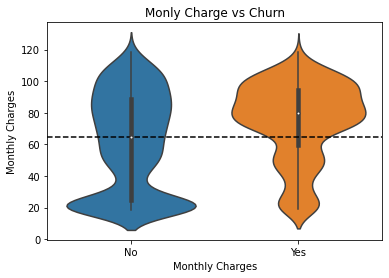

In [46]:
#Vizulizing the churn rate compared to monthly charges with a black line for overall churn mean
sns.violinplot('churn', 'monthly_charges', data=telco_train, alpha=.25)
plt.axhline(telco_train.monthly_charges.mean(), ls = '--', color = 'black')
plt.xlabel('Monthly Charges')
plt.ylabel('Monthly Charges')
plt.title('Monly Charge vs Churn')

This graph does show that monthy charges are higher for customers who churn vs. customers who do not. To gain more insight on churn levels, I divided the monthly charges into groups to see what levels incurred higher churn. To find statistical significance I will use a t-test to determine

In [7]:
# Preforming a T test for contiunous monthly charges against categorical churn
a = 0.01
t, p = stats.ttest_ind(telco_train.monthly_charges, telco_train.churn_encoded, equal_var=False)
t, p 

if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

We reject the null hypothesis and this variable is statistically significant


Text(0.5, 1.0, 'Monthly Charge Groups')

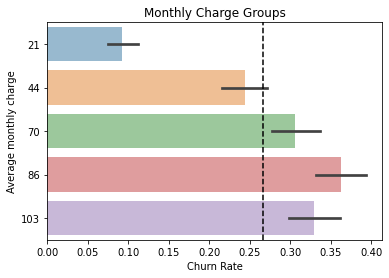

In [45]:
# Breaking down the monthly charges into 5 equal sessions to see where churn occurs the most. Chart has overal churn mean as the black line 
sns.barplot(x = 'churn_encoded', y ='monthly_charge_groups', data=telco_train, alpha=.5)
plt.axvline(telco_train.churn_encoded.mean(), ls = '--', color = 'black')
plt.xlabel('Churn Rate')
plt.ylabel('Average monthly charge')
plt.title('Monthly Charge Groups')

Breaking down the monthly charges helps visulaize churn rates at thoughout the increasing intervals. We can see that churn steadily increases as the monthly payments increase,until the last 20%. Athough the last group is lower than previous it is still the second highest. The highest churn occurs in the 60-79% range with an average os $86 monthly payments. 

Answer: We can confidently say that customers who churn pay more monthly than customers who do not churn. After statistical testing, we reject our null hypothesis

### Question 2: Are customers with fiber optic more or less likely to churn?
-            Null Hypothesis: Fiber Optic customers churn less than or equal amount to non-fiber optic customers 
-            Alt Hypothesis: Fiber Optic customers pay more than non-fiber optic customers      

Text(0.5, 1.0, 'Service Type Churn Rate')

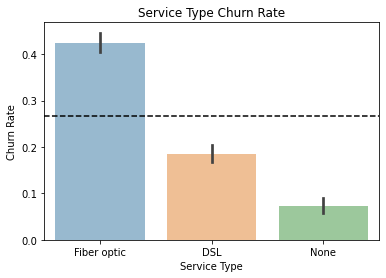

In [44]:
# Plotting out internet service type against churn with overal churn mean as the black line
sns.barplot('internet_service_type', 'churn_encoded', data=telco_train, alpha=.5)
plt.axhline(telco_train.churn_encoded.mean(), ls = '--', color = 'black')
plt.xlabel('Service Type')
plt.ylabel('Churn Rate')
plt.title('Service Type Churn Rate')

The graph above shows the churn rate of each type of internet Telco offers. It is easy to see that Fiber Optic internet has churn rate double the next closest service type, DSL. 
In the prep stage I encoded internet_service_types so that I can can test fiber optic statistically and enter it into the models.

In [10]:
# Making a crosstab to preform a chi squared test on my target variable
internet_service_stat = pd.crosstab(telco_train['internet_service_type_Fiber optic'], telco_train.churn_encoded)

a = 0.01

chi2, p, degf, expected = stats.chi2_contingency(internet_service_stat)

if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

We reject the null hypothesis and this variable is statistically significant


### Question 3: Are month to month customers more or less likely to churn?
-            Null Hypothesis: Month to month customers churn less than or equal amount to contracted customers 
-           Alt Hypothesis: Month to month customers churn more than contracted customers  

Text(0.5, 1.0, 'Contract type Curn')

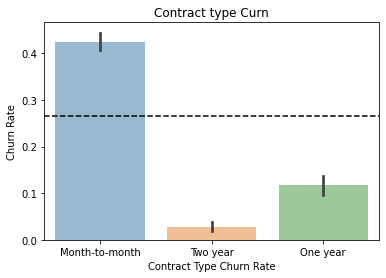

In [43]:
# Vizualizing the contract type against the rate of churn with churn mean as the black line
sns.barplot('contract_type', 'churn_encoded', data=telco_train, alpha=.5)
plt.axhline(telco_train.churn_encoded.mean(), ls = '--', color = 'black')
plt.xlabel('Contract Type Churn Rate')
plt.ylabel('Churn Rate')
plt.title('Contract type Curn')

Here we can see that month to month significantly increases customer churn rate. For the statistical test and models, I will use the encoded feature. 

In [12]:
# Created a crosstab to preform Chi Square test against target variable
contract_stat = pd.crosstab(telco_train['contract_type_Month-to-month'], telco_train.churn_encoded)


a = 0.01

chi2, p, degf, expected = stats.chi2_contingency(contract_stat)

if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

We reject the null hypothesis and this variable is statistically significant


### Question 4: Does bundling of internet and telephone services mean customers churn more than customers with just internet or just phone customers?
-            Null Hypothesis - Customer who bundled internet and phone are less likely to churn.
-            Alt Hypothesis - Customers who bundled are equal or more likely to churn.

Text(0.5, 1.0, 'Bundled Vs. Churn')

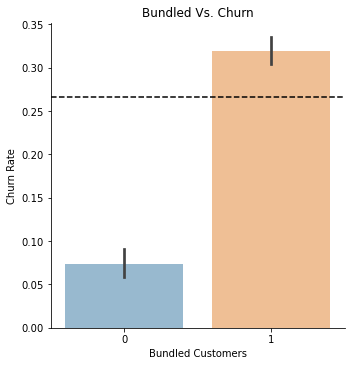

In [42]:
# Chart to vizualize the those who bundle and churn compared to non bunlded customers
sns.catplot(x = 'Bundled', y ='churn_encoded', data=telco_train, alpha=.5, kind='bar')
plt.axhline(telco_train.churn_encoded.mean(), ls = '--', color = 'black')
plt.xlabel('Bundled Customers')
plt.ylabel('Churn Rate')
plt.title('Bundled Vs. Churn')

The majority of customers bundle their internet and phone. The graph above shows that bundled customers churn more than none bundled. 

In [14]:
# created a crosstab to preform the chi square test on my target variable 
bundled_stat = pd.crosstab(telco_train.Bundled, telco_train.churn_encoded)

# setting confidence level
a = 0.01

#assigning the results of the test to variables
chi2, p, degf, expected = stats.chi2_contingency(bundled_stat)

if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

We reject the null hypothesis and this variable is statistically significant


## Predicting Churn - Exploration Summary
Based off my EDA, I will be using the above features as well as my background knowledge of payment type and tenure to build my model. 

Key takeaways from my exploration questions:
- Monthly Charges plays significant role in factors of churn
- Customers with Fiber internet are significantly more likely churn than those without
- Month to month customers are significantly more likely to churn than those with contracts
- Customers who bundle are more likely to churn than those who do not.

Based on the results of the tests and analysis, I will be including these features in my model.

Other features that I include will be based on background knowledge and relationship to the features from questions:
- One year and two year contracts which relate to month to month conracts
- Payment type of electronic check from previous work showing statistical significance
- Tenure is added to the model for the same reason as above.
- Bundled monthly which combines month to month and bundled with internet and phone 

# Modeling to Predict Churn

- We will pick the best model from each loop based on my working file where I looped through K Nearest Neighbor, Random Forest, and Logistic Regression to find ideal hyperparameters. 
- All three models will use the same variables and start with with train only. Second is tested on validate to test out of sample and from out of sample, I will pick the highest overal accuracy. 
- To find the best model, I will use the best accuracy against my validate portion of the data. 

## Baseline
- As determined above, my baseline will be 73% or the equivelent of guessing that every customer would not churn

### Assigning variables

In [15]:
# Setting my x variables to be the features I selected during my eda to model and setting my y variable to be the target of churn
x_vars = ['monthly_charges', 'contract_type_One year', 'contract_type_Two year', 'contract_type_Month-to-month', 'bundled_monthly',  'internet_service_type_Fiber optic', 'payment_type_Electronic check', 'tenure']
y_vars = 'churn_encoded'

# Splitting the data into testing sections to run the model without any leakage and to detect for overfitting
X_train, y_train = telco_train[x_vars], telco_train[y_vars]
x_validate, y_validate = telco_validate[x_vars], telco_validate[y_vars]
x_test, y_test = telco_test[x_vars], telco_test[y_vars]

## First model is Logistic Regression

In [16]:
# Using my exploration file I chose the best level of c for the model to use here. 
logit1 = LogisticRegression(random_state=123, C=1)

# Fitting the model to the train dataset
logit1.fit(X_train, y_train)


# Using the score function to print the model's preformance on the train set
print("Model trained on selected features")
print('Accuracy of Logistic Regression classifier on training set: {:.2%}'
     .format(logit1.score(X_train, y_train)))

Model trained on selected features
Accuracy of Logistic Regression classifier on training set: 79.13%


In [17]:
# Using the score function to print the model's preformance on the validate set
print('Accuracy of random forest classifier on validate set: {:.2%}'
     .format(logit1.score(x_validate, y_validate)))

Accuracy of random forest classifier on validate set: 77.60%


## Second Model is K Nearest Neighbors

In [18]:
# Create KNN Object
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Fit object to training data
knn.fit(X_train, y_train)

# Make predictions on training data
y_pred = knn.predict(X_train)

# Using the score function to print the model's preformance on the training set
print('Accuracy of KNN classifier on training set: {:.2%}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 83.24%


In [19]:
# Using the score function to print the model's preformance on the validate set
print('Accuracy of random forest classifier on validate set: {:.2%}'
     .format(knn.score(x_validate, y_validate)))

Accuracy of random forest classifier on validate set: 75.47%


## Third model is Random Forest

In [47]:
# Making the model for Random Forest using the max depth found in exploration loop and setting other hyperparameters
rft = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=10, n_estimators=100, max_depth=5,max_features='sqrt', random_state=123)

# Fitting the model to the train data section
rft.fit(X_train, y_train)


# Using the score function to print the model's preformance on the train set
print('Accuracy of random forest classifier on training set: {:.2%}'
     .format(rft.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 80.24%


In [21]:
# Using the score function to print the model's preformance on the validate set
print('Accuracy of random forest classifier on validate set: {:.2%}'
     .format(rft.score(x_validate, y_validate)))

Accuracy of random forest classifier on validate set: 78.13%


## Model Take aways and selection
- Looping through in my working notebook helped narrow some hyperparameters 
- I chose the models with a high accuracy and minimal distance between the train and validate set
- All the models beat the baseline of 73%, but random forest had the best accuracy on the training set.
- I chose random forest for the best model becuase it had the highest accuracy for the validate

# Testing my best model, Random Forest, on the test set

In [22]:
#Using sklearn score feature to determine the accuracy of the model on the test segment of data and printing the results
print('Accuracy of random forest classifier on test set: {:.2%}'
     .format(rft.score(x_test, y_test)))

Accuracy of random forest classifier on test set: 80.24%



 ## Summary 
    1. Telco has a churn of 27%. The baseline to test against my models will be 73% which would be the accuracy if I did we guessed that a customer would not churn for all customers.  My model out preformed with an accuracy of 80.24% out preformed the baseline prediction. 
    
    2. New Telco customers are more likely to churn than customers who have been with the company awhile. 
    
    3. Monthly charges have a positive correlation to churn rate. As the monthly charge increases so does the likelyhood of churn.
    
    4. The top factors for churn include high monthly charges, month-to-month Contract, customers who bundle phone and internet, and customers with fiber optic internet


## Recommendations
-    I recommend the company to incentivize month to month customers to switch to a contract through some form of a discount.
-  Have the company look at incentivizing fiber optic internet service  without bundling a phoneline.Currently all customers with fiber bundle their plan with a phoneline. Incentivizing a non-bundled would help lower the churn rate to that of non-bundled customers, which is less than half of overall churn rate. 
-  Additionally, customer with security features and tech support stay longer than customers without. Offering a bundle deal with those features will help reduce churn
-  The company can look into updating their streaming service and offerings becuase customers churn less without streaming service, especially in fiber.  

## Next Steps
-  If possible, I would ask for pricing detail for every featue and service to breakdown why monthly charges trend higher with tenure.
-  Ask if any promotions were in place for customers for signing up for all contract types.
-  Implement more sophisticated models and hyperparametes to acheive a higher accuracy. 


# Preparing a CSV with the model's prediction

In [26]:
# Reacquiring the data to have a fresh dataset with all columns 
total_df = acquire.get_telco_data()

# Created a different prep function in order to keep customer_id, as requested in the deliverable
total_df = telco_prep.predict_telco_data(total_df)

# Seperating the data to use only the features used by my best model without dropping irrelevent columns
predict_telco = total_df[x_vars]

#Using the predict probability function to apply the probabilities to the entire data set for the deliverable and making a new column for the data
total_df['probability'] = rft.predict_proba(predict_telco)[:,1]

#Doing the same as above except for just the prediction if a customer will churn where churn = 1 and no churn = 0
total_df['prediction'] = rft.predict(predict_telco)



In [28]:
# Making a new dataframe for the deliverable to only include the requested columns
prediction_and_probability = total_df[['customer_id', 'probability', 'prediction']]

# Checking the above code
prediction_and_probability.head()

# Saving the deliverable requirements to a csv file
prediction_and_probability.to_csv('telco_predicition_and_probability.csv')

,customer_id,probability,prediction
0,0002-ORFBO,0.090373,0
1,0003-MKNFE,0.244938,0
2,0004-TLHLJ,0.664189,1
3,0011-IGKFF,0.643311,1
4,0013-EXCHZ,0.633093,1
